# PCA

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dtumathtools as dmt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

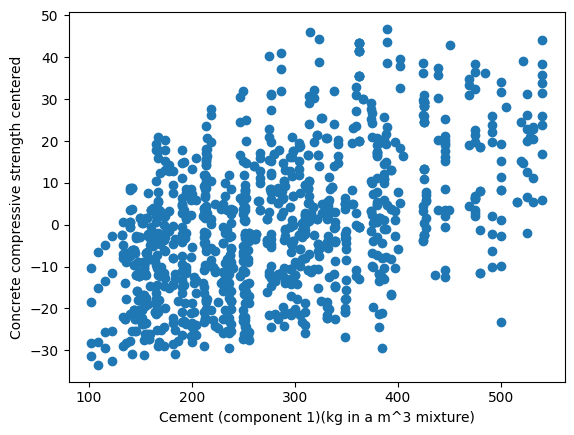

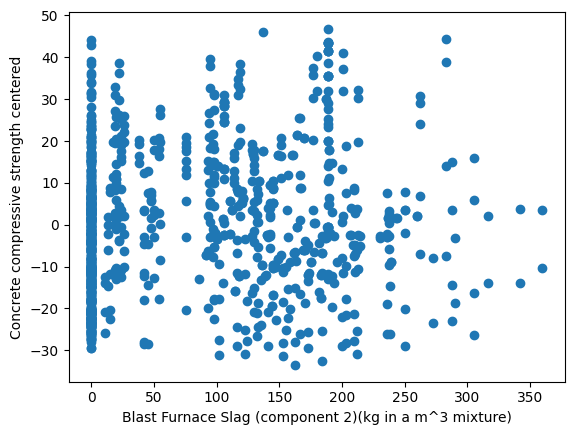

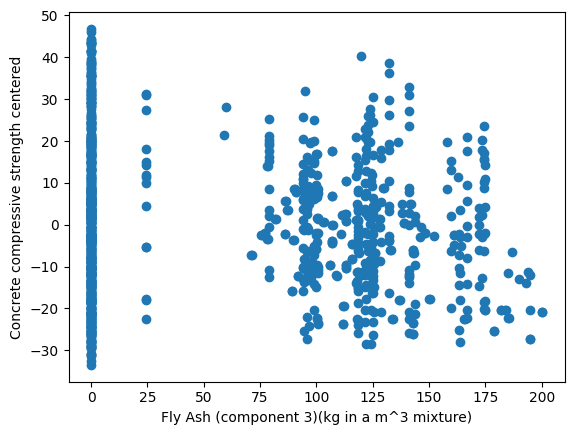

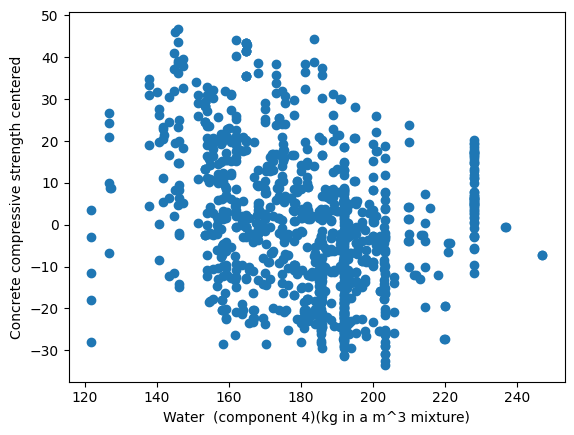

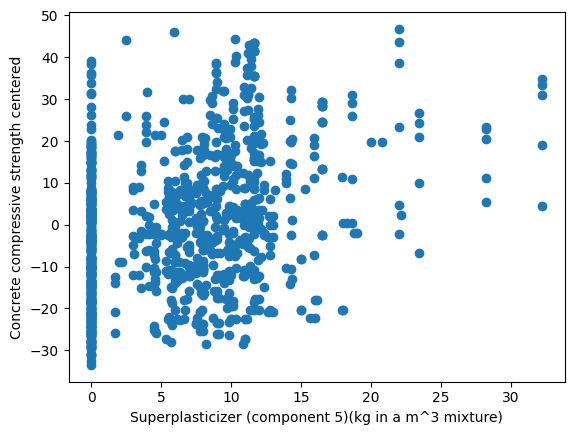

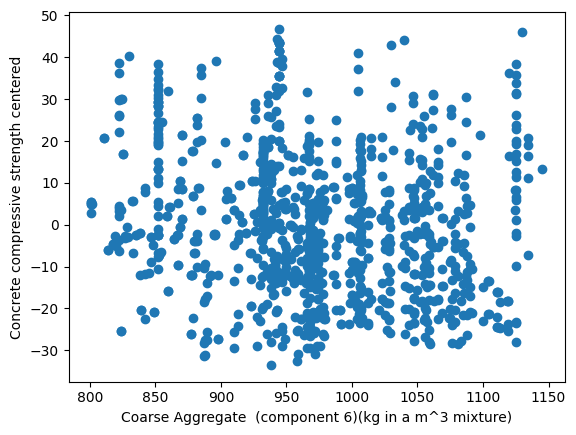

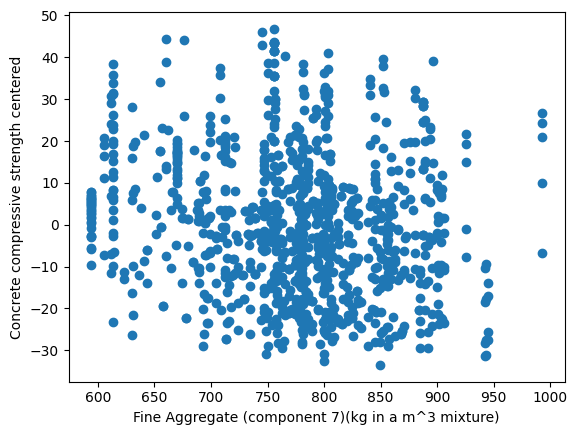

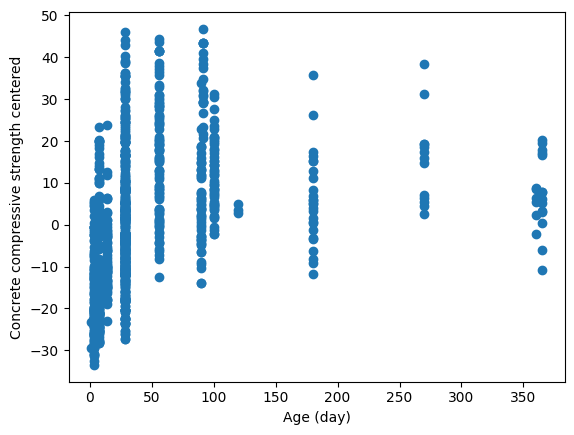

In [6]:
# The principal directions of the considered PCA components. 

data = pd.read_excel("data/Concrete_Data.xls") # Extracting data using panda
data["Concrete compressive strength centered"] = data["Concrete compressive strength(MPa, megapascals) "]-data["Concrete compressive strength(MPa, megapascals) "].mean() # Centering the data

# Plotting the components
plt.scatter(data["Cement (component 1)(kg in a m^3 mixture)"], data["Concrete compressive strength centered"])
plt.xlabel("Cement (component 1)(kg in a m^3 mixture)")
plt.ylabel("Concrete compressive strength centered")
plt.show()

plt.scatter(data["Blast Furnace Slag (component 2)(kg in a m^3 mixture)"], data["Concrete compressive strength centered"])
plt.xlabel("Blast Furnace Slag (component 2)(kg in a m^3 mixture)")
plt.ylabel("Concrete compressive strength centered")
plt.show()

plt.scatter(data["Fly Ash (component 3)(kg in a m^3 mixture)"], data["Concrete compressive strength centered"])
plt.xlabel("Fly Ash (component 3)(kg in a m^3 mixture)")
plt.ylabel("Concrete compressive strength centered")
plt.show()

plt.scatter(data["Water  (component 4)(kg in a m^3 mixture)"], data["Concrete compressive strength centered"])
plt.xlabel("Water  (component 4)(kg in a m^3 mixture)")
plt.ylabel("Concrete compressive strength centered")
plt.show()

plt.scatter(data["Superplasticizer (component 5)(kg in a m^3 mixture)"], data["Concrete compressive strength centered"])
plt.xlabel("Superplasticizer (component 5)(kg in a m^3 mixture)")
plt.ylabel("Concrete compressive strength centered")
plt.show()

plt.scatter(data["Coarse Aggregate  (component 6)(kg in a m^3 mixture)"], data["Concrete compressive strength centered"])
plt.xlabel("Coarse Aggregate  (component 6)(kg in a m^3 mixture)")
plt.ylabel("Concrete compressive strength centered")
plt.show()

plt.scatter(data["Fine Aggregate (component 7)(kg in a m^3 mixture)"], data["Concrete compressive strength centered"])
plt.xlabel("Fine Aggregate (component 7)(kg in a m^3 mixture)")
plt.ylabel("Concrete compressive strength centered")
plt.show()

plt.scatter(data["Age (day)"], data["Concrete compressive strength centered"])
plt.xlabel("Age (day)")
plt.ylabel("Concrete compressive strength centered")
plt.show()

In [7]:
df = pd.read_excel("data/Concrete_Data.xls")
input_data = df.iloc[:, :-1] # Excluding the lastr column as it's the output
scale = StandardScaler() 
input_data = scale.fit_transform(input_data) # Centering and scaling the data

# Applying PCA to our data
pca = PCA()
input_pca = pca.fit_transform(input_data)
print(pca.components_)
exvar = pca.explained_variance_ratio_

# Calculating the cumulative explained variance
cumulative_exvar = np.zeros(len(exvar))
cumulative_exvar[0] = exvar[0]
for i in range(1, len(exvar)):
    cumulative_exvar[i] = cumulative_exvar[i-1] + exvar[i]

[[ 0.09827295  0.17725317 -0.39464178  0.54705427 -0.50591697  0.03805569
  -0.40190575  0.29152151]
 [-0.11181022  0.68562442 -0.14379962  0.0529213   0.28360405 -0.63034067
  -0.01956876 -0.12567848]
 [ 0.81449534 -0.17340093 -0.40777505 -0.21308433  0.23419128 -0.17256392
  -0.00484576  0.10097873]
 [ 0.05437612  0.36269994 -0.22654071 -0.29601729  0.03741495  0.5457468
  -0.38554226 -0.5278852 ]
 [-0.14788131  0.02121136 -0.5499439  -0.07046483 -0.35441099  0.03310011
   0.7011056  -0.22809163]
 [-0.20312941  0.30495397 -0.18309239 -0.36612798  0.19324298  0.31451971
   0.09236092  0.74389043]
 [-0.22208449 -0.22837173 -0.35236521  0.52417861  0.66463655  0.22701428
   0.03908382 -0.06925024]
 [ 0.44612725  0.43735666  0.38191098  0.38874361  0.05176469  0.34935768
   0.43337671  0.01289534]]


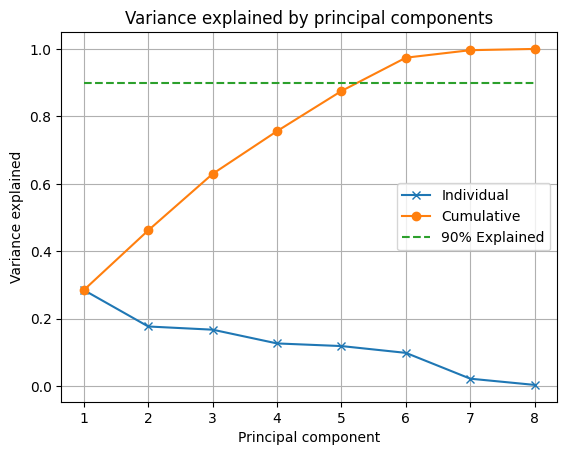

Principal component 1: 0.2850 (28.50%) variance explained
Principal component 2: 0.1770 (17.70%) variance explained
Principal component 3: 0.1675 (16.75%) variance explained
Principal component 4: 0.1268 (12.68%) variance explained
Principal component 5: 0.1190 (11.90%) variance explained
Principal component 6: 0.0988 (9.88%) variance explained
Principal component 7: 0.0222 (2.22%) variance explained
Principal component 8: 0.0038 (0.38%) variance explained


In [8]:
plt.figure()

# Defining the 3 graphs
plt.plot(range(1, len(exvar) + 1), exvar, "x-")
plt.plot(range(1, len(cumulative_exvar) + 1), cumulative_exvar, "o-")
plt.plot(range(1, len(exvar) + 1), np.ones(len(exvar)) * 0.9, "--")

plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "90% Explained"])

plt.grid()
plt.show()

for i, v in enumerate(exvar):
    print(f"Principal component {i+1}: {v:.4f} ({v*100:.2f}%) variance explained")

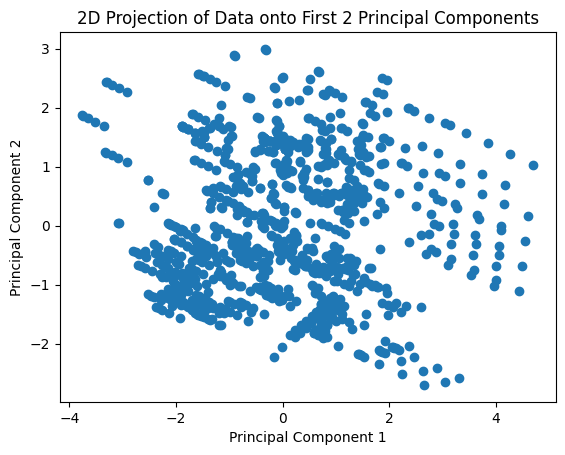

In [ ]:
""" 2D plot """

X_2d = input_pca[:, :2]  # Select the first 2 components

#Plot the transformed data
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of Data onto First 2 Principal Components')
plt.show()

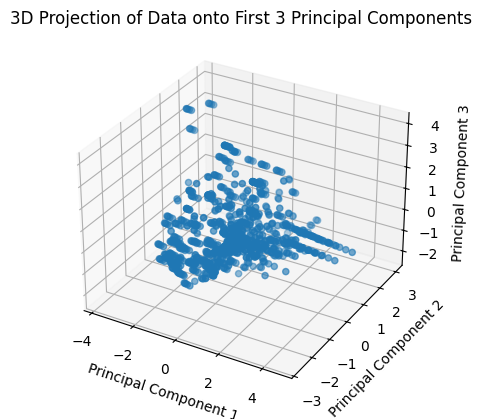

In [12]:
""" 3D plot """

# Project onto the first 3 components
X_3d = input_pca[:, :3]

# Plot in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D Projection of Data onto First 3 Principal Components')
plt.show()